# 1. Recopilación de datos

In [39]:
import pandas
import numpy
tweets_csv = pandas.read_csv('tweets.csv',encoding='utf-8')

In [40]:
# Número de filas y columnas
print(tweets_csv.shape)

(4994, 1)


In [41]:
# 10 primeras filas
tweets_csv.head(10)

,text
0,I just saw that they found that Tracy girl in ...
1,stupid movies we watched... mirrors ugggggh......
2,Waiting at the airport for my ride while I get...
3,@lolitariot oh no hope you're not getting sic...
4,@kaeeeep yeah! i know! it was horrible!!!! ugh...
5,has a huuuge headache! omg I feel like crap!
6,stupid arranged marriages... i'll convert so y...
7,ugh horrible ending to the sandra kantu story ...
8,vacations makes me feel sick!
9,@syekr is myki really horrible?


# 2. Eliminación de palabras que no aportan información

Librería NLTK, eliminar stop words, menciones, hastags, URL.
Usar lematización y tokenización

In [42]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aleme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aleme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
def limpiar_texto(tweet):
                
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Eliminar menciones
    tweet = re.sub(r'#', '', tweet)  # Eliminar hashtags
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  # Eliminar URLs
    
    tweet = re.sub(r'\W', ' ', tweet)  # Eliminar símbolos extraños(caracteres no alfanuméricos)
    
    tweet = tweet.lower()
    
    # Tokenización
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(tweet)
    
    # Eliminar stop words
    stop_words = set(stopwords.words('english'))  # stop word para mensajes en ingles
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lematización (stemming)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Unir tokens nuevamente en un solo texto
    tweet_cleaned = ' '.join(tokens)
        
    return tweet_cleaned

Escribimos los mensajes en un txt

In [44]:
with open('tweets_message.txt', 'w', encoding='utf-8') as file:
    for value in tweets_csv.iloc[:, -1]:
        file.write(str(value) + '\n')

Mostramos los mensajes originales

In [45]:
with open('tweets_message.txt', 'r') as file:
    tweets_txt = file.read()

print(tweets_txt)

I just saw that they found that Tracy girl in a piece of luggage... How fucking terrible 
stupid movies we watched... mirrors ugggggh... stooopeeed!!! rip off! 
Waiting at the airport for my ride while I get harassed by 2 men trying to sell me ugly hats.. Why me?!  I just want to sleep..
@lolitariot oh no  hope you're not getting sick too!
@kaeeeep yeah! i know! it was horrible!!!! ugh. saddening. 
has a huuuge headache! omg I feel like crap! 
stupid arranged marriages... i'll convert so you can marry me...love you! 
ugh horrible ending to the sandra kantu story  prayers go out.
vacations makes me feel sick! 
@syekr is myki really horrible? 
@stephenkruiser that's horrible  sorryto hear that.
18 weeks till sisters home.. i missed her call, again! its the worst feeling in the world. 
I have mouth ulcer  so painful to talk and eat! 
@rootbeerfloats8 You hate Billy now?! 
Sorting brekkie for the kids then off to the horrible place called work, boohoo 
@tacce dang, I'll get HOUSE off iTune

Le aplicamos a los mensajes la función _limpiar_texto_. Creamos una lista con los tweets limpios

In [46]:
cleaned_tweets= [] 
with open('tweets_message.txt', 'r') as file:
    for line in file:
        cleaned_tweet = limpiar_texto(line)
        cleaned_tweets.append(cleaned_tweet)

Mostramos los 13 primeros tweets de la lista a modo de ejemplo para comprobar que el método funciona correctamente

In [47]:
for i in range(13):
    print(cleaned_tweets[i])

saw found tracy girl piece luggage fucking terrible
stupid movie watched mirror ugggggh stooopeeed rip
waiting airport ride get harassed 2 men trying sell ugly hat want sleep
oh hope getting sick
yeah know horrible ugh saddening
huuuge headache omg feel like crap
stupid arranged marriage convert marry love
ugh horrible ending sandra kantu story prayer go
vacation make feel sick
myki really horrible
horrible sorryto hear
18 week till sister home missed call worst feeling world
mouth ulcer painful talk eat


## 3. Etiquetado de datos

In [48]:
import csv
from textblob import TextBlob

Se usará la librería TextBlob. Se etiqueta según la polaridad del mensaje, cuanto mas se acerque la polaridad a -1 es más negativo, si es 0 es neutro y, cuanto más se acerque a 1 más positivo es. Para este caso vamos a considerar un tweet como "Muy feliz" si la polaridad es mayor a 0.65, "Contento" si es menor que 0.65 mayor a 0.3, "Neutro" si está entre 0.3 y -0.3, "Molesto" si está entre -0.3 y -0.65, y "Hater" si la polaridad es menor a -0.65

In [49]:
# con polaridad
classified_tweets = []

for line in cleaned_tweets:
    blob = TextBlob(line)
    polaridad = blob.sentiment.polarity
    
    if polaridad > 0.65:
        label = 'Muy feliz'
        
    elif polaridad > 0.3:
        label = 'Contento'
    elif polaridad > -0.3:
        label = 'Neutro'
    elif polaridad > -0.65:
        label = 'Molesto'
    else:
        label = 'Hater'
    
    classified_tweets.append([line, label])

# Guardar los resultados en un archivo CSV
with open('classified_tweets.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['tweet', 'label'])
    writer.writerows(classified_tweets)

# 4. Validación de la predicción realizada

Para la validación de las etiquetas se revisarán manualmente las asignadas en el paso anterior a cada tweet. Se genera así los datos de entrenamiento, que se encuentran en _reviewed_sample.csv_

Tras la revisión de los datos se obtiene la siguiente proporción 

In [51]:
reviewed_sample = pandas.read_csv('reviewed_sample.csv')
atributos = reviewed_sample.iloc[:, [0, 1]]# selección de las columnas de atributos # reviewed_sample['tweet']
objetivo = reviewed_sample['label']  # selección de la columna objetivo
codificador_objetivo = preprocessing.LabelEncoder()
print(pandas.Series(objetivo).value_counts(normalize=True))

Contento     0.200641
Neutro       0.200240
Hater        0.199840
Molesto      0.199840
Muy feliz    0.199439
Name: label, dtype: float64


Se puede observar que la proporción es bastante equilibrada ya que en el paso "1.Recopilación de datos" se pedía una muestra equilibrada

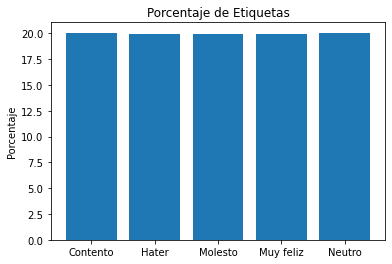

In [53]:
import matplotlib.pyplot as plt

objetivo_codificado = codificador_objetivo.fit_transform(objetivo)
# Contar las ocurrencias de cada etiqueta
conteo_etiquetas = pandas.Series(objetivo_codificado).value_counts()

# Obtener los porcentajes de cada etiqueta
porcentajes = conteo_etiquetas / len(objetivo) * 100

# Crear la gráfica de barras
plt.bar(porcentajes.index, porcentajes)
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Etiquetas')
etiquetas = codificador_objetivo.inverse_transform(porcentajes.index)
plt.xticks(porcentajes.index, etiquetas)

plt.show()

## 5. Entrenamiento del modelo

In [55]:
from sklearn import naive_bayes
import numpy as np
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### Validación cruzada

Se separan de los datos de _reviewed_sample.csv_ el conjunto de entrenamiento y de prueba. La validación cruzada consiste en dividir los datos en un número de pliegues "cv". Por ejemplo, si se establece cv=5, los datos se dividirán en 5 pliegues o partes iguales. Luego, el modelo se entrenará y evaluará 5 veces, utilizando cada vez un pliegue diferente como conjunto de prueba y el resto de los pliegues como conjunto de entrenamiento.

El rendimiento del modelo se evalúa para cada pliegue y se devuelve una lista de puntuaciones de rendimiento correspondientes a cada iteración. Estas puntuaciones se pueden utilizar para calcular una métrica agregada, como la media, que proporciona una estimación del rendimiento general del modelo.Se usará el modelo cuya precisión sea mayor

In [56]:
# Cargar el archivo CSV con las frases etiquetadas
with open('reviewed_sample.csv', 'r', encoding='utf-8') as archivo_csv:
    reader = csv.reader(archivo_csv)
    encabezado = next(reader)  # Ignorar la primera fila (encabezado)
    frases_etiquetadas = list(reader)

# Dividir los datos en características (frases) y etiquetas
frases = [frase_etiqueta[0] for frase_etiqueta in frases_etiquetadas]
etiquetas = [frase_etiqueta[1] for frase_etiqueta in frases_etiquetadas]

# Vectorizar las características utilizando TF-IDF
vectorizer = TfidfVectorizer()
caracteristicas = vectorizer.fit_transform(frases)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, etiquetas, test_size=0.3, random_state=8)

# Entrenar y evaluar el modelo Naive Bayes utilizando validación cruzada
naive_bayes = MultinomialNB()
scores_naive_bayes = cross_val_score(naive_bayes, caracteristicas, etiquetas, cv=6)

# Entrenar y evaluar el modelo Árbol de Decisión utilizando validación cruzada
arbol_decision = DecisionTreeClassifier()
scores_arbol_decision = cross_val_score(arbol_decision, caracteristicas, etiquetas, cv=6)

# Entrenar y evaluar el modelo k-NN utilizando validación cruzada
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, caracteristicas, etiquetas, cv=6)

# Calcular la precisión media para cada modelo
precision_media_naive_bayes = scores_naive_bayes.mean()
precision_media_arbol_decision = scores_arbol_decision.mean()
precision_media_knn = scores_knn.mean()

mejor_modelo = max(precision_media_naive_bayes,precision_media_arbol_decision,precision_media_knn)

if mejor_modelo == precision_media_naive_bayes:
    modelo = naive_bayes
elif mejor_modelo == precision_media_arbol_decision:
    modelo = arbol_decision
else:
    modelo = knn


# Imprimir los resultados
print("Precisión media Naive Bayes:", precision_media_naive_bayes)
print("Precisión media Árbol de Decisión:", precision_media_arbol_decision)
print("Precisión media kNN:", precision_media_knn)

Precisión media Naive Bayes: 0.6623954870409703
Precisión media Árbol de Decisión: 0.7350769634776988
Precisión media kNN: 0.26351333802751875


## 6. Predicción de tweets

### Naive Bayes

In [57]:
# Entrenar el modelo Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = naive_bayes.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo Naive Bayes:", precision)

Precisión del modelo Naive Bayes: 0.6591060707138092


### Árboles de decisión

In [58]:
# Entrenar el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = decision_tree.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo Árbol de Decisión:", precision)

Precisión del modelo Árbol de Decisión: 0.7178118745830554


### kNN

In [59]:
# Entrenar el modelo k-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = knn.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo kNN:", precision)

Precisión del modelo kNN: 0.26817878585723814


-->*hay que comentar los resultados del mejor modelo y evaluar la precisión de las predicciones, ¿un 69% es bajo?*



## 7. Análisis de tweets de personajes públicos

Positivas: Cristiano Ronaldo


----> *hay q poner 30 tweets de cada*

In [138]:
print("el mejor modelo según la precisión es:",modelo)

el mejor modelo según la precisión es: DecisionTreeClassifier()


Se limpian los tweets

In [145]:
# Obtener los últimos 30 tweets de la persona con mala fama (hater)
lista_tweets_hater = ['A reminder: the people in power don’t need conferences, treaties or agreements to start taking real climate action. They can start today.When enough people come together then change will come and we can achieve almost anything. So instead of looking for hope - start creating it.',
'1/3 We live in a time of a climate emergency. We dont accept the status quo. We stop. We pause. We regenerate and restore. We create enough basic services for all.']

# Obtener los últimos 30 tweets de la persona con valoración social positiva
lista_tweets_positivos = ['Which is your favourite?Tell me in the comments below 👇 Get the @livescore app and never miss a goal',
'Great team spirit to come back and win it!Big thank you to the fans that stood with us when we most needed ! 🙌🏻 💛💙',
'Proud to extend my partnership with @herbalife as we enter a new era together. Thank you for fueling my performance over the years in the gym and on the field #CR7Drive #LiveYourBestLife'
'For a chance to win my signed shirt, enter below and download the free @livescore app',
'Excited to visit the new @_Jacobandco boutique in Riyad, Saudi Arabia! Thank you Jacob Arabo for the warm welcome.']

tweets_hater= []
for line in lista_tweets_hater:
    cleaned_tweet = limpiar_texto(line)
    tweets_hater.append(cleaned_tweet)
    
tweets_positivos= []
for line in lista_tweets_positivos:
    cleaned_tweet = limpiar_texto(line)
    tweets_positivos.append(cleaned_tweet)

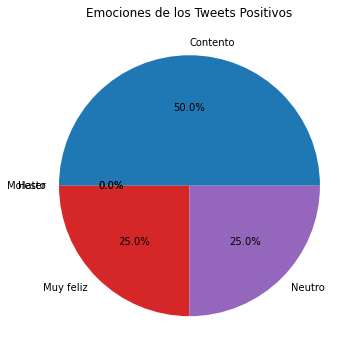

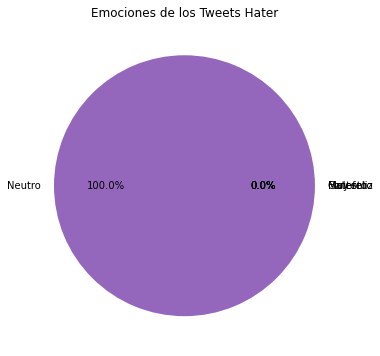

Porcentaje de emociones en los Tweets Positivos:
Contento : 0.5
Hater : 0.0
Molesto : 0.0
Muy feliz : 0.25
Neutro : 0.25

Porcentaje de emociones en los Tweets Hater:
Contento : 0.0
Hater : 0.0
Molesto : 0.0
Muy feliz : 0.0
Neutro : 1.0


In [146]:

# Entrenar el modelo seleccionado
modelo.fit(X_train, y_train)

# Realizar predicciones en los tweets positivos
predicciones_positivos = modelo.predict(vectorizer.transform(tweets_positivos))

# Realizar predicciones en los tweets hater
predicciones_hater = modelo.predict(vectorizer.transform(tweets_hater))

# Calcular el porcentaje de cada etiqueta en las predicciones de los tweets positivos
porcentaje_positivos = {etiqueta: (predicciones_positivos == etiqueta).mean() for etiqueta in modelo.classes_}

# Calcular el porcentaje de cada etiqueta en las predicciones de los tweets hater
porcentaje_hater = {etiqueta: (predicciones_hater == etiqueta).mean() for etiqueta in modelo.classes_}

# Generar el pie chart de las emociones de los tweets positivos
plt.figure(figsize=(6, 6))
plt.pie(list(porcentaje_positivos.values()), labels=list(porcentaje_positivos.keys()), autopct='%1.1f%%')
plt.title("Emociones de los Tweets Positivos")
plt.show()

# Generar el pie chart de las emociones de los tweets hater
plt.figure(figsize=(6, 6))
plt.pie(list(porcentaje_hater.values()), labels=list(porcentaje_hater.keys()), autopct='%1.1f%%')
plt.title("Emociones de los Tweets Hater")
plt.show()

# Imprimir los resultados
print("Porcentaje de emociones en los Tweets Positivos:")
for etiqueta, porcentaje in porcentaje_positivos.items():
    print(etiqueta, ":", porcentaje)

print("\nPorcentaje de emociones en los Tweets Hater:")
for etiqueta, porcentaje in porcentaje_hater.items():
    print(etiqueta, ":", porcentaje)